In [5]:
from email.header import Header
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os

plt.rcParams['font.sans-serif']=['SimHei'] 

In [ ]:

path=r':D:\\work\\code_\\data'
file=glob.glob(os.path.join("weatherdata*.csv"))

dl = []
for f in file:
    dl.append(pd.read_csv(f,sep=',',index_col=None))
df = pd.concat(dl)
df.to_excel("data.csv")

header = ['date','time','county','Province', 'Temp', 'Humidity', 'Climate', 'Climate (English)', 'Climate Code', 'Air Quality (AQI)', 'PM2.5', 'Air Pressure', 'Visibility', 'Wind', 'Wind Class', 'Wind Speed', 'Real-time Precipitation', '24-hour Precipitation']
data1 = pd.read_excel("data.csv",names = header)

data1_temp = data1["Temp"]
data1_date = data1["date"].str.replace("(星期*)","")

plt.figure(figsize=(11, 4))
plt.plot(data1_date,data1_temp,marker='o',label='Temp')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('摄氏度/℃')
plt.title("洛阳气温变化图",fontsize = 20)

plt.axhline(data1_temp.mean(), color='black', linestyle='--')

plt.legend()
plt.show()

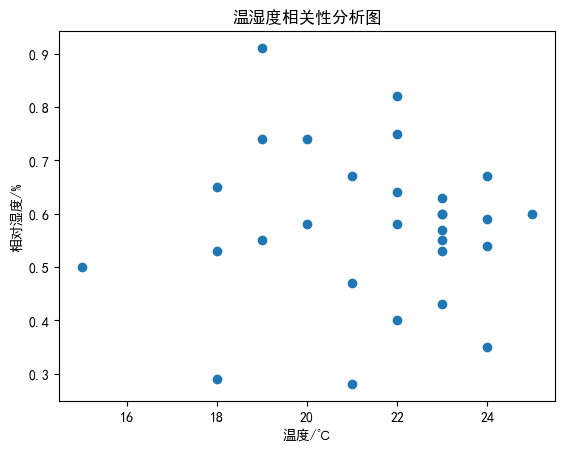

In [17]:
plt.scatter(data1["Temp"],data1["湿度"])
plt.ylabel('相对湿度/%')
plt.xlabel('Temp/℃')
plt.title('温湿度相关性分析图')
plt.show()

NameError: name 'data1_date' is not defined

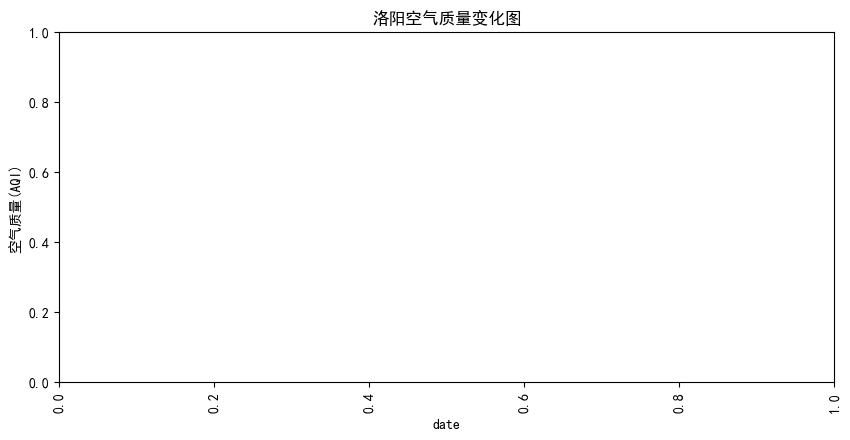

In [6]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,2)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('空气质量(AQI)')
plt.title("洛阳空气质量变化图")
plt.bar(data1_date,data1["PM2.5"],color= 'green',width = 0.5)

plt.axhline(data1["PM2.5"].mean(), color='black', linestyle='--')

plt.show()

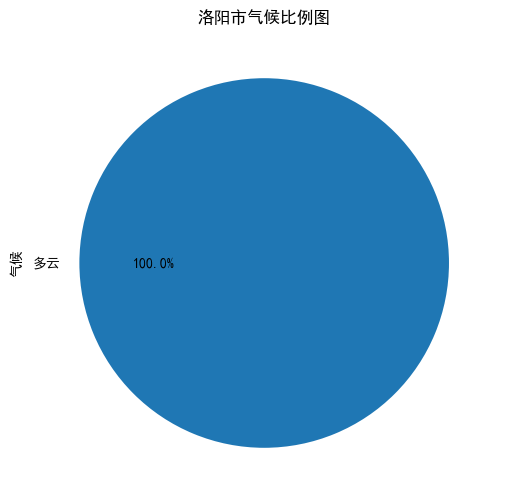

In [26]:
data1_climate = data1["气候"].value_counts()

plt.figure(figsize=(6,6))
data1_climate.plot.pie(autopct='%1.1f%%',colormap='tab20')
plt.title('洛阳市气候比例图')
plt.show()